In [105]:
import pandas as pd
import numpy as np

# 1.0 Loading the datasets

In [60]:
city_bikes_df = pd.read_pickle("df_stations.pkl")
city_bikes_df = city_bikes_df.loc[:449]
yelp_df = pd.read_pickle("yelp_df.pkl")

In [102]:
yelp_df.head()

,yelp_id,yelp_name,yelp_category,yelp_longitude,yelp_latitude,yelp_distance,yelp_ratings
0,Ohengzi4viLEXqhK50aLxg,Jaclyn's,Caribbean,43.66627,-79.31802,172.375134,4.5
1,a-Mo7Ipu_c5y21mmg0-F7g,Agio,Italian,43.67599,-79.45066,646.471211,4.5
2,Ohengzi4viLEXqhK50aLxg,Jaclyn's,Caribbean,43.66627,-79.31802,29.257263,4.5
3,qekAZVcOoJjMBnN5rJ_4fQ,The Rabbit Hole,Gastropubs,43.64995,-79.37976,426.288752,4.0
4,saijdv-vXJrvsCfvr7SZOw,Katsuya,Japanese,43.65995,-79.37882,432.975108,4.5


In [103]:
city_bikes_df.head()

,empty_slots,free_bikes,id,latitude,longitude,name,timestamp
0,2,16,fb337bbed72e2be090071e199899b2be,43.665269,-79.319796,Queen St E / Woodward Ave,2023-09-06T03:00:17.295000Z
1,2,13,4ff88d5880e71aa40d34cfe5d09b0ca7,43.671420,-79.445947,Primrose Ave / Davenport Rd,2023-09-06T03:00:17.296000Z
2,5,18,a09c67c0b419654d907c9134b108e328,43.666224,-79.317693,Queen St. E / Rhodes Ave.,2023-09-06T03:00:17.296000Z
3,21,0,d6a9daee68070a8b106cfb598d81308c,43.653236,-79.376716,Bond St / Queen St E,2023-09-06T03:00:17.301000Z
4,13,14,8f8af40d9388c8a3962559e8681d3db7,43.663722,-79.380288,Church St / Alexander St,2023-09-06T03:00:17.302000Z


In [100]:
# Assigning values

empty_slots = np.array(city_bikes_df["empty_slots"])
free_slots = np.array(city_bikes_df["free_bikes"])
bike_slots = empty_slots + free_slots

yelp_ratings = np.array(yelp_df["yelp_distance"])

In [85]:
X = bike_slots.copy()
y = yelp_ratings.copy()

# Linear Regression

In [101]:
from sklearn import linear_model, datasets
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [87]:
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X)

In [88]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.444
Date:                Mon, 18 Sep 2023   Prob (F-statistic):             0.0115
Time:                        13:24:43   Log-Likelihood:                -3125.5
No. Observations:                 450   AIC:                             6255.
Df Residuals:                     448   BIC:                             6263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        329.3090     36.612      8.995      0.0

Insights

1. An R-squared value of 0.014 means that the distance of restairants to the bike station and the number of bikes in each stations are not related to each others.


# 3.0 Scatterplot of the data used

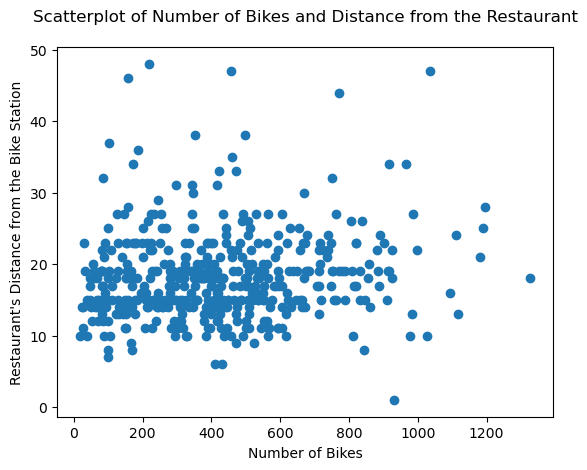

In [104]:
plt.scatter(yelp_ratings, bike_slots)
plt.ylabel("Restaurant's Distance from the Bike Station")
plt.xlabel("Number of Bikes")
plt.title("Scatterplot of Number of Bikes and Distance from the Restaurant\n")

plt.show()

# Stretch

How can you turn the regression model into a classification model?